Informe de resultados del modelo entrenado con los datos de entrada de 450x450px, siendo la clase positiva las imágenes con retinopatía(2+3+4) y la clase negativa las que no tienen retinopatía, o tienen una retinopatía leve(0+1)


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import glob
import shutil
import logging

import random
from random import shuffle

import imgaug as ia
import imgaug.augmenters as iaa

logger = tf.get_logger()
logger.setLevel(logging.ERROR)


print("Num GPUS avadible:",len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUS avadible: 1


In [2]:
val_labels=np.load('matrices_resultados//validacion.npy')
test_labels=np.load('matrices_resultados//testeo.npy')



In [3]:


y_pred1 =  np.load('matrices_resultados//validacion450x450_2.npy')

y_pred2 =  np.load('matrices_resultados//testeo450x450_2.npy')





In [4]:
from sklearn.metrics import roc_curve,roc_auc_score, confusion_matrix

fpr1 , tpr1 , thresholds1 = roc_curve ( val_labels , 1-y_pred1,pos_label=0)

fpr2 , tpr2 , thresholds2 = roc_curve ( test_labels , 1-y_pred2,pos_label=0)



In [5]:
def plot_roc_curve(fpr,tpr): 
  plt.plot(1-tpr,1-fpr,) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('1-sensibilidad') 
  plt.ylabel('Especificidad') 
  plt.show()    
  

In [6]:
def tpr_to_umbrales(tpr,fpr,thresholds,lista):
    umbrales=[]
    fprumb=[]
    tprumb=[]
    
    for i in lista:
        umbrales.append(thresholds[(np.where(tpr>=i))[0][0]])
        fprumb.append(fpr[(np.where(tpr>=i))[0][0]])
        tprumb.append(tpr[(np.where(tpr>=i))[0][0]])
    return (umbrales, fprumb, tprumb)

In [7]:
def umbral_mejor(tpr,fpr,thresholds):
    distancias=(1-tpr)+fpr
    
    umbral=thresholds[(np.where(distancias==min(distancias)))[0][0]]
    tpr1=tpr[(np.where(distancias==min(distancias)))[0][0]]
    fpr1=fpr[(np.where(distancias==min(distancias)))[0][0]]
    
    return (umbral,tpr1,fpr1)

Evaluación Validación


In [8]:
roc_auc_score(val_labels, y_pred1)

0.907390065540578

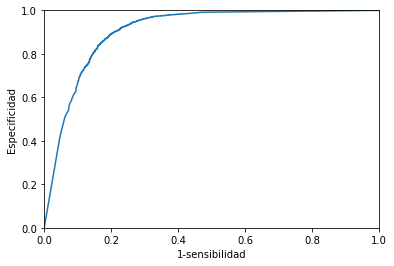

In [9]:
plot_roc_curve (fpr1,tpr1)

In [10]:
tp, fn, fp, tn = confusion_matrix(val_labels, y_pred1.round()).ravel()
(tp,fp,tn,fn)



(1619, 301, 5143, 583)

In [11]:
lista=[0.65,0.70,0.75,0.80,0.85,0.90,0.95,0.96,0.97,0.98]
  

umbrales , fprumb , tprumb =tpr_to_umbrales(tpr1,fpr1,thresholds1,lista)

for idx,i in enumerate(lista):
    print("sensibilidad objetivo:"+str(i)+" sensibilidad:"+str(tprumb[idx])+" ->especificidad:"+str(1-fprumb[idx])+" ratio de falsos negativos:"+str(1-tprumb[idx])+" ratio de falsos positivos:"+str(fprumb[idx])+" con umbral: "+str(umbrales[idx])+"\n\n")

sensibilidad objetivo:0.65 sensibilidad:0.6503178928247049 ->especificidad:0.9752020573108009 ratio de falsos negativos:0.34968210717529513 ratio de falsos positivos:0.024797942689199118 con umbral: 0.9981803


sensibilidad objetivo:0.7 sensibilidad:0.701180744777475 ->especificidad:0.9617927994121969 ratio de falsos negativos:0.29881925522252495 ratio de falsos positivos:0.03820720058780309 con umbral: 0.9311952


sensibilidad objetivo:0.75 sensibilidad:0.7502270663033606 ->especificidad:0.9327700220426157 ratio de falsos negativos:0.24977293369663944 ratio de falsos positivos:0.06722997795738428 con umbral: 0.21374166


sensibilidad objetivo:0.8 sensibilidad:0.8001816530426885 ->especificidad:0.891807494489346 ratio de falsos negativos:0.1998183469573115 ratio de falsos positivos:0.10819250551065393 con umbral: 0.009452164


sensibilidad objetivo:0.85 sensibilidad:0.8505903723887375 ->especificidad:0.8085966201322556 ratio de falsos negativos:0.14940962761126253 ratio de falsos posit

In [12]:
umbral_1,tpr_1,fpr_1=umbral_mejor(tpr1,fpr1,thresholds1)

print("tpr:"+str(tpr_1)+"->fpr: "+str(fpr_1)+" con umbral: "+str(umbral_1))

tpr:0.798819255222525->fpr: 0.10617193240264511 con umbral: 0.010507941


Evaluación test 


In [13]:
roc_auc_score(test_labels, y_pred2)

0.9145593308903325

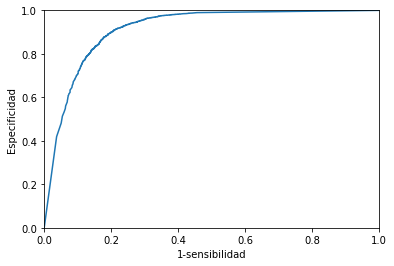

In [14]:
plot_roc_curve (fpr2,tpr2)

In [15]:
tp, fn, fp, tn = confusion_matrix(test_labels, y_pred2.round()).ravel()
(tp,fp,tn,fn)



(1663, 576, 9557, 603)

In [16]:
umbrales , fprumb , tprumb =tpr_to_umbrales(tpr2,fpr2,thresholds2,lista)

for idx,i in enumerate(lista):
    print("sensibilidad objetivo:"+str(i)+" sensibilidad:"+str(tprumb[idx])+" ->especificidad:"+str(1-fprumb[idx])+" ratio de falsos negativos:"+str(1-tprumb[idx])+" ratio de falsos positivos:"+str(fprumb[idx])+" con umbral: "+str(umbrales[idx])+"\n\n")    

sensibilidad objetivo:0.65 sensibilidad:0.6500441306266549 ->especificidad:0.9754268232507648 ratio de falsos negativos:0.3499558693733451 ratio de falsos positivos:0.024573176749235173 con umbral: 0.99885637


sensibilidad objetivo:0.7 sensibilidad:0.7003530450132391 ->especificidad:0.9587486430474687 ratio de falsos negativos:0.29964695498676086 ratio de falsos positivos:0.041251356952531334 con umbral: 0.9177052


sensibilidad objetivo:0.75 sensibilidad:0.7502206531332745 ->especificidad:0.9349649659528274 ratio de falsos negativos:0.24977934686672554 ratio de falsos positivos:0.0650350340471726 con umbral: 0.26775932


sensibilidad objetivo:0.8 sensibilidad:0.8000882612533098 ->especificidad:0.8994374814961018 ratio de falsos negativos:0.19991173874669022 ratio de falsos positivos:0.10056251850389815 con umbral: 0.012366772


sensibilidad objetivo:0.85 sensibilidad:0.850397175639894 ->especificidad:0.827691700384881 ratio de falsos negativos:0.14960282436010597 ratio de falsos posi

In [17]:
umbral_2,tpr_2,fpr_2=umbral_mejor(tpr2,fpr2,thresholds2)

print("tpr:"+str(tpr_2)+"->fpr: "+str(fpr_2)+" con umbral: "+str(umbral_2))

tpr:0.7917034421888791->fpr: 0.09079246027829863 con umbral: 0.022757888
